In [1]:
#     AUTHOR:     ERYL KENN VICTORINO
#     PURPOSE:    NATURAL LANGUAGE PROCESSING (NLP) TUTORIAL
#                 from 'Machine Learning A-Z™: Hands-On Python & R In Data Science' on Udemy
#                 by Kirill Eremenko, Hadelin de Ponteves, and the SuperDataScience Team
#     MOD DATE:   4/4/2019

In [2]:
#   IMPORT LIBRARIES
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [3]:
#   IMPORT DATASET
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = "\t", quoting = 3)

In [4]:
#   CLEAN TEXT
corpus = []
for i in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [5]:
#   BAG OF WORDS MODEL
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [6]:
#   TRAINING/TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [7]:
#   FEATURE SCALING
# unnecessary since the values are mostly zeroes and ones

In [8]:
#   PERFORMANCE CALCULATORS
def accuracy_calculator(cm):
    TP, TN, FP, FN = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return accuracy
    
def precision_calculator(cm):
    TP, FP = cm[1, 1], cm[0, 1],
    precision = TP / (TP + FP)
    return precision
    
def recall_calculator(cm):
    TP, FN = cm[1, 1], cm[1, 0]
    recall = TP / (TP + FN)
    return recall
    
def f1_calculator(cm):
    TP, FP, FN = cm[1, 1], cm[0, 1], cm[1, 0]
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2 * precision * recall / (precision + recall)
    return f1

In [9]:
#   CREATE PERFORMNCE TABLE
criterion = ['accuracy', 'precision', 'recall', 'f1']
classifiers = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine',
               'Naive Bayes', 'Decision Tree', 'Random Forest']
performance = pd.DataFrame(index = classifiers, columns = criterion)

In [10]:
#   LOGISTIC REGRESSION FIT, ROC, AND AUC
lg_classifier = LogisticRegression(random_state = 0)
lg_classifier.fit(X_train, y_train)
lg_y_pred = lg_classifier.predict(X_test)
lg_cm = confusion_matrix(y_test, lg_y_pred)
performance.at['Logistic Regression', 'accuracy'] = accuracy_calculator(lg_cm)
performance.at['Logistic Regression', 'precision'] = precision_calculator(lg_cm)
performance.at['Logistic Regression', 'recall'] = recall_calculator(lg_cm)
performance.at['Logistic Regression', 'f1'] = f1_calculator(lg_cm)
lg_fpr, lg_tpr, thresholds = roc_curve(lg_y_pred, y_test)
lg_roc_auc = auc(lg_fpr, lg_tpr)

In [11]:
#   KNN FIT, ROC, AND AUC
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
knn_y_pred = knn_classifier.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_y_pred)
performance.at['K-Nearest Neighbors', 'accuracy'] = accuracy_calculator(knn_cm)
performance.at['K-Nearest Neighbors', 'precision'] = precision_calculator(knn_cm)
performance.at['K-Nearest Neighbors', 'recall'] = recall_calculator(knn_cm)
performance.at['K-Nearest Neighbors', 'f1'] = f1_calculator(knn_cm)
knn_fpr, knn_tpr, thresholds = roc_curve(knn_y_pred, y_test)
knn_roc_auc = auc(knn_fpr, knn_tpr)

In [12]:
#   SVM FIT, ROC, AND AUC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)
svm_y_pred = svm_classifier.predict(X_test)
svm_cm = confusion_matrix(y_test, svm_y_pred)
performance.at['Support Vector Machine', 'accuracy'] = accuracy_calculator(svm_cm)
performance.at['Support Vector Machine', 'precision'] = precision_calculator(svm_cm)
performance.at['Support Vector Machine', 'recall'] = recall_calculator(svm_cm)
performance.at['Support Vector Machine', 'f1'] = f1_calculator(svm_cm)
svm_fpr, svm_tpr, thresholds = roc_curve(svm_y_pred, y_test)
svm_roc_auc = auc(svm_fpr, svm_tpr)

In [13]:
#   NAIVE BAYES FIT, ROC, AND AUC
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_y_pred = nb_classifier.predict(X_test)
nb_cm = confusion_matrix(y_test, nb_y_pred)
performance.at['Naive Bayes', 'accuracy'] = accuracy_calculator(nb_cm)
performance.at['Naive Bayes', 'precision'] = precision_calculator(nb_cm)
performance.at['Naive Bayes', 'recall'] = recall_calculator(nb_cm)
performance.at['Naive Bayes', 'f1'] = f1_calculator(nb_cm)
nb_fpr, nb_tpr, thresholds = roc_curve(nb_y_pred, y_test)
nb_roc_auc = auc(nb_fpr, nb_tpr)

In [14]:
#   DECISION TREE FIT, ROC, AND AUC
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)
dt_y_pred = dt_classifier.predict(X_test)
dt_cm = confusion_matrix(y_test, dt_y_pred)
performance.at['Decision Tree', 'accuracy'] = accuracy_calculator(dt_cm)
performance.at['Decision Tree', 'precision'] = precision_calculator(dt_cm)
performance.at['Decision Tree', 'recall'] = recall_calculator(dt_cm)
performance.at['Decision Tree', 'f1'] = f1_calculator(dt_cm)
dt_fpr, dt_tpr, thresholds = roc_curve(dt_y_pred, y_test)
dt_roc_auc = auc(dt_fpr, dt_tpr)

In [15]:
#   RANDOM FOREST FIT, ROC, AND AUC
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_y_pred)
performance.at['Random Forest', 'accuracy'] = accuracy_calculator(rf_cm)
performance.at['Random Forest', 'precision'] = precision_calculator(rf_cm)
performance.at['Random Forest', 'recall'] = recall_calculator(rf_cm)
performance.at['Random Forest', 'f1'] = f1_calculator(rf_cm)
rf_fpr, rf_tpr, thresholds = roc_curve(rf_y_pred, y_test)
rf_roc_auc = auc(rf_fpr, rf_tpr)

In [16]:
#   PERFORMANCE TABLE
performance

,accuracy,precision,recall,f1
Logistic Regression,0.71,0.758621,0.640777,0.694737
K-Nearest Neighbors,0.61,0.676056,0.466019,0.551724
Support Vector Machine,0.72,0.752688,0.679612,0.714286
Naive Bayes,0.73,0.684211,0.883495,0.771186
Decision Tree,0.71,0.747253,0.660194,0.701031
Random Forest,0.72,0.850746,0.553398,0.670588


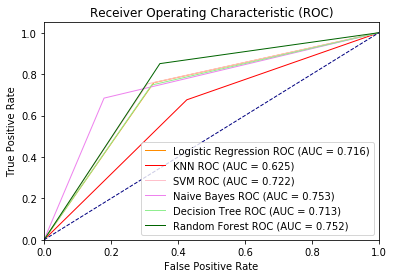

In [17]:
#   ROC AND AUC COMPARISONS FOR ALL CLASSIFIERS
plt.plot(lg_fpr, lg_tpr, color = 'darkorange', lw = 1, label = 'Logistic Regression ROC (AUC = %0.3f)' % lg_roc_auc)
plt.plot(knn_fpr, knn_tpr, color = 'red', lw = 1, label = 'KNN ROC (AUC = %0.3f)' % knn_roc_auc)
plt.plot(svm_fpr, svm_tpr, color = 'pink', lw = 1, label = 'SVM ROC (AUC = %0.3f)' % svm_roc_auc)
plt.plot(nb_fpr, nb_tpr, color = 'violet', lw = 1, label = 'Naive Bayes ROC (AUC = %0.3f)' % nb_roc_auc)
plt.plot(dt_fpr, dt_tpr, color = 'lightgreen', lw = 1, label = 'Decision Tree ROC (AUC = %0.3f)' % dt_roc_auc)
plt.plot(rf_fpr, rf_tpr, color = 'darkgreen', lw = 1, label = 'Random Forest ROC (AUC = %0.3f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 1, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()